# Going Deeper

*... is not always a good idea...*

Deep Learning is all about **depth** so let's go deeper (what could go wrong anyway?)!!!

Start with the usual stuff:

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
%matplotlib inline


# Prepare the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28*28)) / 255.0
x_test = x_test.reshape((-1, 28*28)) / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


Let's see what would happen a few years ago:

In [4]:
model = Sequential()

model.add(Dense(256, activation='sigmoid', input_dim=784, kernel_initializer='random_uniform'))
model.add(Dense(256, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(512, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(512, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(1024, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(1024, activation='sigmoid', kernel_initializer='random_uniform'))

model.add(Dense(10, activation='softmax'))

from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001, momentum=0.9), metrics=['accuracy'])

results = model.fit(x_train, y_train, epochs=20, batch_size=256, verbose=1, validation_data=(x_test, y_test))
print("Train accuracy: ", model.evaluate(x_train, y_train, batch_size=128))
print("Test accuracy: ", model.evaluate(x_test, y_test, batch_size=128))

Epoch 1/20


2024-10-03 14:08:37.019346: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1054 - loss: 2.3271 - val_accuracy: 0.1010 - val_loss: 2.3037
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1050 - loss: 2.3037 - val_accuracy: 0.1135 - val_loss: 2.3023
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1035 - loss: 2.3037 - val_accuracy: 0.1135 - val_loss: 2.3021
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1099 - loss: 2.3034 - val_accuracy: 0.1010 - val_loss: 2.3022
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1077 - loss: 2.3037 - val_accuracy: 0.1135 - val_loss: 2.3028
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1072 - loss: 2.3032 - val_accuracy: 0.1152 - val_loss: 2.3046
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1051 - loss: 2.3044 - val_accuracy: 0.1135 - val_loss: 2.3034
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1095 - loss: 2.3032 - val_accuracy: 0.0974 - val

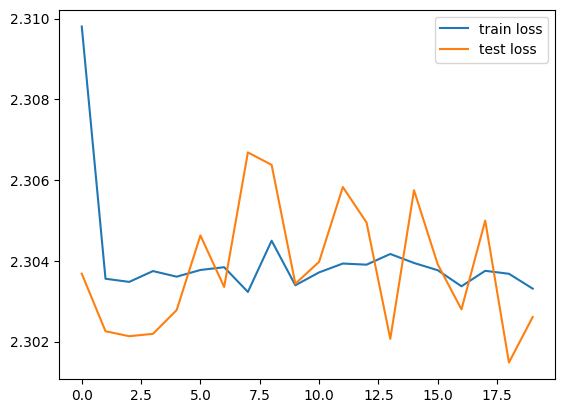

In [5]:
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

Are we doing something wrong? Let's try a simpler model!

In [15]:
model = Sequential()

model.add(Dense(256, activation='sigmoid', input_dim=784, kernel_initializer='random_uniform'))
model.add(Dense(10, activation='softmax'))
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001, momentum=0.9), metrics=['accuracy'])

results = model.fit(x_train, y_train, epochs=20, batch_size=256, verbose=1, validation_data=(x_test, y_test))
print("Train accuracy: ", model.evaluate(x_train, y_train, batch_size=128))
print("Test accuracy: ", model.evaluate(x_test, y_test, batch_size=128))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2791 - loss: 2.2839 - val_accuracy: 0.6464 - val_loss: 2.0042
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6457 - loss: 1.9426 - val_accuracy: 0.7167 - val_loss: 1.7295
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7228 - loss: 1.6795 - val_accuracy: 0.7695 - val_loss: 1.4832
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7632 - loss: 1.4423 - val_accuracy: 0.7983 - val_loss: 1.2755
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7904 - loss: 1.2503 - val_accuracy: 0.8149 - val_loss: 1.1103
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8074 - loss: 1.0960 - val_accuracy: 0.8268 - val_loss: 0.9819
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8217 - loss: 0.9764 - val_accuracy: 0.8365 - val_loss: 0.8835
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8299 - loss: 0.8870 - val_accuracy: 0.

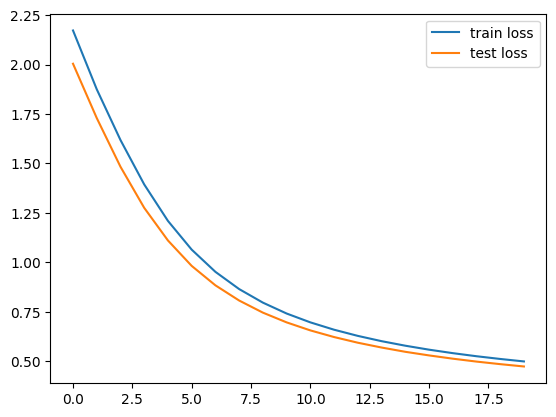

In [16]:

plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

### So what makes deep learning work?

Careful initialization + appropriate activation functions + weight sharing / smart architectures + regularization

Tips:
1. Ensure that a good initialization scheme is used (e.g., Xavier, He, etc. )
2. Use an activation function that does not lead to vanishing gradients (e.g., relu, prelu, elu, ...)
3. Use a regularized network structure (e.g., CNNs, residual connection, ...)
4. Use regularization (e.g., dropout) and/or batch normalization
5. Use an advanced optimizer (e.g., Adam, RMSProp, ...) (use them with a grain of salt)

Let's use some of these techniques!

In [17]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim=784, kernel_initializer=keras.initializers.he_uniform()))
model.add(Dense(256, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
model.add(Dense(512, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
model.add(Dense(512, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
model.add(Dense(1024, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
model.add(Dense(1024, activation='relu', kernel_initializer=keras.initializers.he_uniform()))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

That is a deep one indeed! Let's examine its architecture!

In [18]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,246,154 (8.57 MB)

 Trainable params: 2,246,154 (8.57 MB)

 Non-trainable params: 0 (0.00 B)

Train the model:

In [19]:
results = model.fit(x_train, y_train, epochs=20, batch_size=256, verbose=2, validation_data=(x_test, y_test))

Epoch 1/20


2024-10-03 14:12:37.427421: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_334', 336 bytes spill stores, 288 bytes spill loads

2024-10-03 14:12:37.881191: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_320', 184 bytes spill stores, 184 bytes spill loads

2024-10-03 14:12:38.226881: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_320', 336 bytes spill stores, 288 bytes spill loads

2024-10-03 14:12:39.326757: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_348', 1444 bytes spill stores, 1784 bytes spill loads

2024-10-03 14:12:40.471144: I external/local_xla/xla/s

235/235 - 35s - 149ms/step - accuracy: 0.8671 - loss: 0.4645 - val_accuracy: 0.9456 - val_loss: 0.1849
Epoch 2/20
235/235 - 0s - 2ms/step - accuracy: 0.9540 - loss: 0.1566 - val_accuracy: 0.9592 - val_loss: 0.1313
Epoch 3/20
235/235 - 0s - 2ms/step - accuracy: 0.9688 - loss: 0.1053 - val_accuracy: 0.9648 - val_loss: 0.1097
Epoch 4/20
235/235 - 0s - 2ms/step - accuracy: 0.9766 - loss: 0.0773 - val_accuracy: 0.9704 - val_loss: 0.0982
Epoch 5/20
235/235 - 1s - 4ms/step - accuracy: 0.9823 - loss: 0.0601 - val_accuracy: 0.9688 - val_loss: 0.1008
Epoch 6/20
235/235 - 0s - 2ms/step - accuracy: 0.9863 - loss: 0.0458 - val_accuracy: 0.9723 - val_loss: 0.0897
Epoch 7/20
235/235 - 0s - 2ms/step - accuracy: 0.9896 - loss: 0.0341 - val_accuracy: 0.9691 - val_loss: 0.1019
Epoch 8/20
235/235 - 0s - 2ms/step - accuracy: 0.9921 - loss: 0.0269 - val_accuracy: 0.9724 - val_loss: 0.0878
Epoch 9/20
235/235 - 0s - 2ms/step - accuracy: 0.9947 - loss: 0.0195 - val_accuracy: 0.9746 - val_loss: 0.0882
Epoch 10/

The network perfectly learns the training set (100% accuracy), but it is still below state-of-the-art (~1.9% test error). Let's examine the training curves:

Log data:  dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


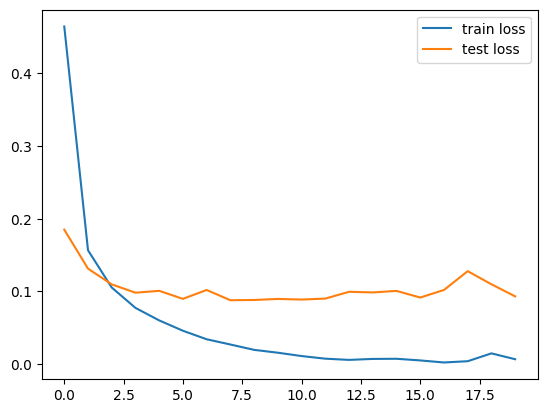

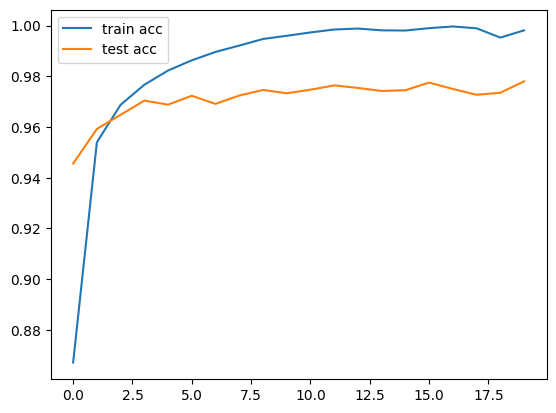

In [22]:
print("Log data: ", results.history.keys())

plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

plt.figure(2)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['train acc', 'test acc'])